In [2]:
#目的是看看正则化处理能否提升模型性能

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 读取最后清洗干净的数据
# df = pd.read_csv("最终干净的数据改.csv")
path = 'C:\\Users\\ASUS\\Desktop\\IOM魔改2\\IOM209\\最终干净的数据改.csv'
try:
    # 将 low_memory 设置为 False
    df = pd.read_csv(path, low_memory=False)
    print("文件读取成功")
except FileNotFoundError:
    print("文件未找到，请检查文件路径。")
except Exception as e:
    print(f"发生其他错误: {e}")

selected_features = [
    'tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
    'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
    'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
    'subway', 'district',
    # 'communityAverage',
    'distance', 'Age',
    'floorType', 'floorHeight', 'room_count', 'room_ratio','north_south','Investment in residential real estate development in Beijing'
]

X = df[selected_features]
y = df["price_log"]  # 使用对数房价

文件读取成功


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Ridge回归
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression")
print(f"Best alpha: {ridge.alpha_}")
print(f"RMSE (log space): {rmse_ridge:.4f}")
print(f"R² score: {r2_ridge:.4f}")

Ridge Regression
Best alpha: 0.1
RMSE (log space): 0.2289
R² score: 0.7345


In [6]:
#Lasso回归
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression")
print(f"Best alpha: {lasso.alpha_}")
print(f"RMSE (log space): {rmse_lasso:.4f}")
print(f"R² score: {r2_lasso:.4f}")


Lasso Regression
Best alpha: 0.003499503364445209
RMSE (log space): 0.2353
R² score: 0.7194


In [7]:
# 对预测值进行反log转换
y_pred_ridge_original = np.expm1(y_pred_ridge)
y_pred_lasso_original = np.expm1(y_pred_lasso)
y_test_original = np.expm1(y_test)

# 计算原始空间下的RMSE
rmse_ridge_original = np.sqrt(mean_squared_error(y_test_original, y_pred_ridge_original))
rmse_lasso_original = np.sqrt(mean_squared_error(y_test_original, y_pred_lasso_original))

print(f"\nRidge RMSE (original): {rmse_ridge_original:.2f} RMB/m²")
print(f"Lasso RMSE (original): {rmse_lasso_original:.2f} RMB/m²")


Ridge RMSE (original): 10223.75 RMB/m²
Lasso RMSE (original): 10607.44 RMB/m²


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15508\2170421570.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ridge_importance.head(15), x="importance", y="feature", palette="Blues_d")


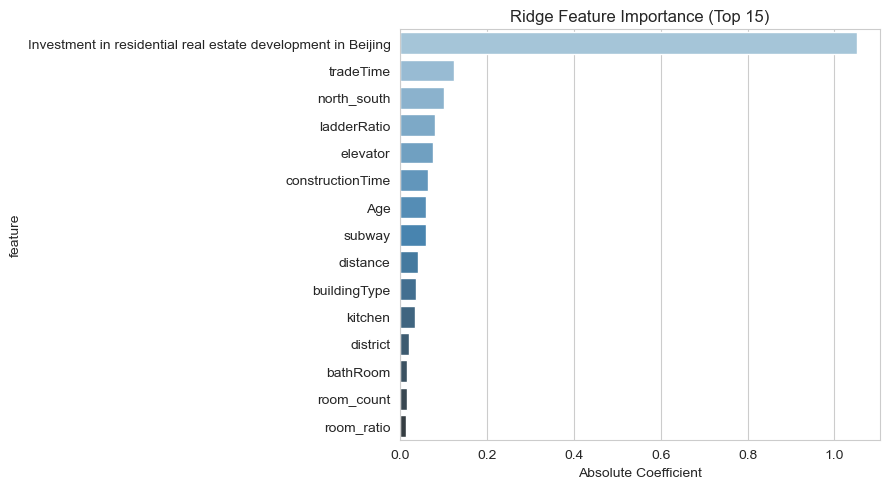

In [8]:
# Ridge 特征重要性
ridge_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": ridge.coef_,
    "importance": np.abs(ridge.coef_)
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(data=ridge_importance.head(15), x="importance", y="feature", palette="Blues_d")
plt.title("Ridge Feature Importance (Top 15)")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15508\273480895.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lasso_importance.head(15), x="importance", y="feature", palette="Oranges_d")


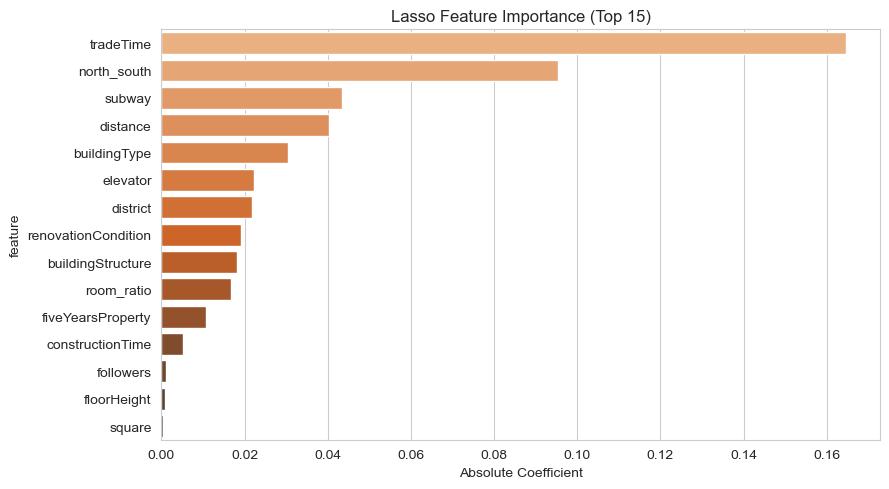

In [9]:
# Lasso 特征重要性（有些会被压缩为0）
lasso_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lasso.coef_,
    "importance": np.abs(lasso.coef_)
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(data=lasso_importance.head(15), x="importance", y="feature", palette="Oranges_d")
plt.title("Lasso Feature Importance (Top 15)")
plt.xlabel("Absolute Coefficient")
plt.tight_layout()
plt.show()

In [11]:
#Ridge 与 Linear Regression 得分一致，说明 多重共线性没有严重干扰，同时 Ridge 模型 更鲁棒
#Lasso 模型效果较差

In [ ]:
#后续可以选择Ridge 选出 Top N 个重要特征（如 Top 10）做轻量模型（建议）